Random Forest

Resumo dos dados:
          Recency   Frequency      Monetary        Time      Target
count  748.000000  748.000000    748.000000  748.000000  748.000000
mean     9.506684    5.514706   1378.676471   34.282086    0.237968
std      8.095396    5.839307   1459.826781   24.376714    0.426124
min      0.000000    1.000000    250.000000    2.000000    0.000000
25%      2.750000    2.000000    500.000000   16.000000    0.000000
50%      7.000000    4.000000   1000.000000   28.000000    0.000000
75%     14.000000    7.000000   1750.000000   50.000000    0.000000
max     74.000000   50.000000  12500.000000   98.000000    1.000000


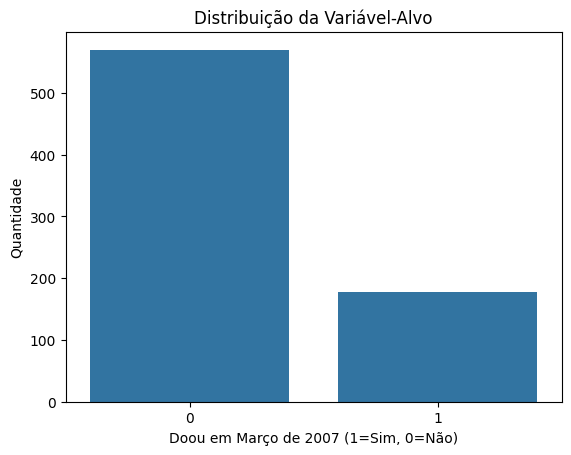

Acurácia: 0.7422222222222222

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.78      0.91      0.84       165
           1       0.53      0.28      0.37        60

    accuracy                           0.74       225
   macro avg       0.65      0.60      0.60       225
weighted avg       0.71      0.74      0.71       225



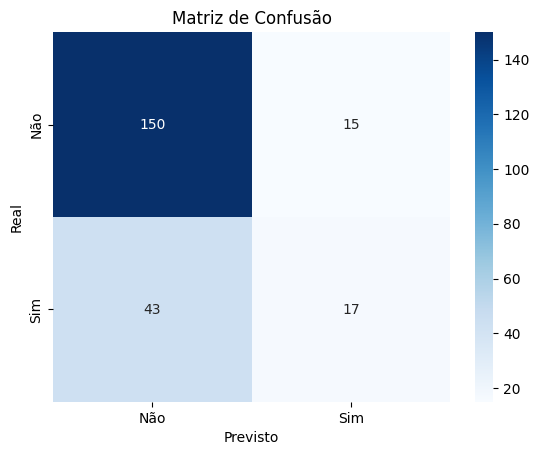

['blood_donation_model.pkl']

In [2]:
# Importando bibliotecas
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando os dados
file_path = "/content/sample_data/transfusion.csv"  # Altere se necessário
data = pd.read_csv(file_path)

# Renomeando colunas para facilitar o uso
data.columns = ["Recency", "Frequency", "Monetary", "Time", "Target"]

# Análise Exploratória
print("Resumo dos dados:")
print(data.describe())

# Verificando balanceamento da classe alvo
sns.countplot(x="Target", data=data)
plt.title("Distribuição da Variável-Alvo")
plt.xlabel("Doou em Março de 2007 (1=Sim, 0=Não)")
plt.ylabel("Quantidade")
plt.show()

# Dividindo dados em características (X) e alvo (y)
X = data[["Recency", "Frequency", "Monetary", "Time"]]
y = data["Target"]

# Padronizando as características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividindo os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Treinando o modelo com Random Forest
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Fazendo previsões
y_pred = model.predict(X_test)

# Avaliação do modelo
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))

# Matriz de Confusão
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=["Não", "Sim"], yticklabels=["Não", "Sim"])
plt.title("Matriz de Confusão")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

# Exportando o modelo para uso futuro
import joblib
joblib.dump(model, "blood_donation_model.pkl")
